***
# ISOM3360 Data Mining for Business Analytics
## Group 23 Project Code - Credit Card Defaultee Analysis
### Part 2.3 - Naive Bayes Classifier
***

Name: LAM, Ho Chit  
ITSC: hclamao  
SID: 20607878

Name: LEE, Ho Wan Owen  
ITSC: hwolee  
SID: 20604852

Name: LEE, Wai Chung  
ITSC: wcleeaj  
SID: 20702733

### Workflow of this notebook (TBC)

1. Explore features and characteristics of dataset
2. Drop columns of low data quality (e.g. large amounts of empty values)
3. Determine $k$ columns to keep in the dataset (feature selection)
4. Perform one-hot encoding
5. Split into training and testing sets
6. Perform data cleaning
   - Dealing with missing values
7. Perform data standardization / normalization
8. Export preprocessed data to .csv files at `./data_preprocessed/`

### Naive Bayes
we will use all the train data (891 examples) to construct the tree and evaluate the model

#### Step 1: Import the training and testing set and modules

In [1]:
import pandas as pd
import numpy as np
#Import Gaussian Naive Bayes model from sklearn
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Naive Bayes Classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
gnb = GaussianNB()

pd.set_option('display.max_rows', 500)
raw_df = pd.read_csv('../data_preprocessed/raw2.csv', index_col='SK_ID_CURR')

In [2]:
raw_df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,...,0.638780,0.06429,0.147780,0.000007,0.052317,0.887344,0.036366,0.008510,0.015873,0.048258
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.454517,3.692794e+05,0.013831,4363.988632,141275.766519,3522.886321,...,0.480355,0.24527,0.354882,0.002550,0.222666,0.316173,0.187200,0.091858,0.124983,0.214312
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Step 2: Define useful features

In [3]:
# define independent attributes 
features = sorted(raw_df)
features

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_INCOME_TOTAL_MINMAX',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'EMERGENCYSTATE_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FEMALE',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUME

In [4]:
raw_df.isnull().sum()

TARGET                                                    0
NAME_CONTRACT_TYPE                                        0
FLAG_OWN_CAR                                              0
CNT_CHILDREN                                              0
AMT_INCOME_TOTAL                                          0
AMT_CREDIT                                                0
AMT_ANNUITY                                               0
AMT_GOODS_PRICE                                           0
REGION_POPULATION_RELATIVE                                0
DAYS_BIRTH                                                0
DAYS_EMPLOYED                                             0
DAYS_REGISTRATION                                         0
DAYS_ID_PUBLISH                                           0
OWN_CAR_AGE                                          202929
FLAG_MOBIL                                                0
FLAG_EMP_PHONE                                            0
FLAG_WORK_PHONE                         

In [5]:
raw_df['DAYS_LAST_PHONE_CHANGE'].fillna(raw_df['DAYS_LAST_PHONE_CHANGE'].mean(), inplace=True)

In [6]:
raw_df['EXT_SOURCE_3'].fillna(raw_df['EXT_SOURCE_3'].mean(),inplace=True)
raw_df['EXT_SOURCE_3'].mean()

0.5108529061805426

In [7]:
raw_df['EXT_SOURCE_2'].fillna(raw_df['EXT_SOURCE_2'].mean(),inplace=True)
raw_df['EXT_SOURCE_2'].mean()

0.5143926741308488

In [8]:
raw_df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(raw_df['DEF_60_CNT_SOCIAL_CIRCLE'].mean(),inplace=True)
raw_df['DEF_60_CNT_SOCIAL_CIRCLE'].mean()

0.10004894123788487

In [9]:
raw_df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(raw_df['DEF_30_CNT_SOCIAL_CIRCLE'].mean(),inplace=True)
raw_df['DEF_30_CNT_SOCIAL_CIRCLE'].mean()

0.1434206662533827

In [10]:
raw_df = pd.get_dummies(raw_df, columns=['NAME_CONTRACT_TYPE','OCCUPATION_TYPE','FLAG_OWN_CAR','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','MALE'],drop_first=False)

In [11]:
# Remove apparent null and useless columns
raw_df.dropna(axis=1, inplace=True)

In [12]:
raw_df.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,MALE_False,MALE_True
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0,0,0,0,0,1
100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,0,0,0,0,0,0,0,1,0
100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0,0,0,0,0,1
100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0,0,0,0,1,0
100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0,0,0,0,0,1


#### Step 3: Data Splitting

In [13]:
# define independent variables / attirbutes / features

features = raw_df.columns
features = features.drop('TARGET')

# Applying featurs used in decision tree
# features = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 
#             'NAME_EDUCATION_TYPE_Higher education', 'NAME_INCOME_TYPE_Working', 'DAYS_LAST_PHONE_CHANGE', 
#             'NAME_EDUCATION_TYPE_Secondary / secondary special', 'MALE_True', 'DAYS_ID_PUBLISH', 
#             'NAME_INCOME_TYPE_Pensioner', 'REG_CITY_NOT_WORK_CITY', 'DAYS_REGISTRATION', 'REG_CITY_NOT_LIVE_CITY', 
#             'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'NAME_CONTRACT_TYPE_Revolving loans', 
#             'LIVE_CITY_NOT_WORK_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

# define one single target variable / label
target = ['TARGET']

# get defined training dataset
X = raw_df[features]
y = raw_df[target]

In [14]:
# import train split function
from sklearn.model_selection import train_test_split

# split data into 80% and 20%, put 20% in testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3360)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246008 entries, 269894 to 228644
Columns: 169 entries, CNT_CHILDREN to MALE_True
dtypes: bool(1), float64(13), int64(66), uint8(89)
memory usage: 171.3 MB


#### NB Gaussian

In [15]:
# import cross validation
from sklearn.model_selection import cross_val_predict, cross_val_score

score = cross_val_score(gnb,X_train,y_train,cv=5).mean()
score

/Users/lamhochit/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lamhochit/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lamhochit/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lamhochit/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

0.9137385843237642

In [16]:
pred_y = cross_val_predict(gnb,X_train,y_train,cv=10)
pred_y

/Users/lamhochit/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lamhochit/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lamhochit/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lamhochit/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# Do majority-class prediction (not accept: 0) -> Benchmark model
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.htm
pred_val_maj = np.zeros((X_train.shape[0],),dtype=int)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
print("Accuracy of Benchmark Model:","\n", accuracy_score(y_train, pred_val_maj, normalize=True, sample_weight=None))
print("Accuracy of Naive Bayes Model:","\n", accuracy_score(y_train, pred_y, normalize=True, sample_weight=None))

Accuracy of Benchmark Model: 
 0.9189335306168905
Accuracy of Naive Bayes Model: 
 0.9131776202399922


In [18]:
# print the confusion matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("Confusion Matrix of Benchmark Model:", "\n", confusion_matrix(y_train, pred_val_maj))
print("Confusion Matrix of Naive Bayes Model:", "\n", confusion_matrix(y_train, pred_y))

Confusion Matrix of Benchmark Model: 
 [[226065      0]
 [ 19943      0]]
Confusion Matrix of Naive Bayes Model: 
 [[224543   1522]
 [ 19837    106]]


In [19]:
# print the classification report with precision, recall
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print("Classification Report of Benchmark Model:", "\n", classification_report(y_train, pred_val_maj))
print("Classification Report of Naive Bayes Model:","\n",classification_report(y_train, pred_y))

Classification Report of Benchmark Model: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96    226065
           1       0.00      0.00      0.00     19943

    accuracy                           0.92    246008
   macro avg       0.46      0.50      0.48    246008
weighted avg       0.84      0.92      0.88    246008



/Users/lamhochit/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lamhochit/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lamhochit/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report of Naive Bayes Model: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95    226065
           1       0.07      0.01      0.01     19943

    accuracy                           0.91    246008
   macro avg       0.49      0.50      0.48    246008
weighted avg       0.85      0.91      0.88    246008



In [20]:
# train model using all training dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.fit
gnb.fit(X_train, y_train)

/Users/lamhochit/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# test model (output probability estimate)
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.predict_proba
pred_prob = gnb.predict_proba(X_test)

# show the probability of belonging to class 0 and class 1
pred_prob

array([[9.89165870e-01, 1.08341301e-02],
       [9.67481845e-01, 3.25181547e-02],
       [9.99363363e-01, 6.36637063e-04],
       ...,
       [9.86484455e-01, 1.35155454e-02],
       [9.72364862e-01, 2.76351379e-02],
       [9.84303652e-01, 1.56963485e-02]])

In [22]:
pred_prob[:,1]

array([0.01083413, 0.03251815, 0.00063664, ..., 0.01351555, 0.02763514,
       0.01569635])

In [23]:
# y is the true label, pred_prob[:,1] measures the predicted probability of belonging to class 1 (which is defined as positive class)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1], pos_label=1)

In [24]:
# Aread under ROC curve
roc_auc=auc(fpr,tpr)
roc_auc

0.60555123593915

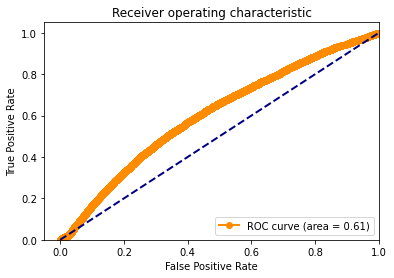

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
lw = 2
plt.plot(fpr, tpr, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Grid Search and Cost Analysis

In [26]:
#import homemade cost function
import sys
sys.path.insert(0, '..')
from utils.custom_cost import custom_loss
# create try_grid
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=10)
}

In [27]:
from sklearn.model_selection import GridSearchCV

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1, 
                            scoring=custom_loss)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/Users/lamhochit/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB(var_smoothing=1.0)


In [30]:
nbModel_grid.best_score_

-12985806.2

In [31]:
best_model = GaussianNB(var_smoothing=1)

In [32]:
best_model.fit(X_train,y_train)

/Users/lamhochit/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB(var_smoothing=1)

In [36]:
y_predict = best_model.predict(X_test)

In [37]:
print("Accuracy:",accuracy_score(y_test, y_predict, normalize=True, sample_weight=None))
print("Confusion Matrix", '\n', confusion_matrix(y_test, y_predict))
print("Classification Report:", '\n', classification_report(y_test, y_predict))

Accuracy: 0.9203941271157504
Confusion Matrix 
 [[56606    15]
 [ 4881     1]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56621
           1       0.06      0.00      0.00      4882

    accuracy                           0.92     61503
   macro avg       0.49      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



### Estimated economic loss

In [39]:
print(f"Estimated economic loss on test set: ${custom_loss(best_model, X_test, y_test)}")

Estimated economic loss on test set: $-31776090


### Conclusion and findings

The accuracy of the model is actually lower than the majority classifier. However, the reason for this is that as the data is skewed towards non-default, it is quite easy to achieve a high accuracy with the majority classifier. With our naive bayes classifer, we can see that we actually have more true positive cases which can be used to reduce the firm's cost.

The false negatvie rate is lower than the benchmark model. This is particularly useful in our usecase as it will cost the issuer a lot of money if the client defaults.

One of the reasons for the poor behaviour of the Naive Bayes Classifier is that the features seems to be correlated, where the independence assumption doesn't hold

## This is the end of Part 2.3 Naive Bayes Classifier.